# Prompt Templates and Prompt Values

###### Mastering LangChain: ChatOpenAI Model IO in Python!

###### Run the line of code below to check the version of langchain in the current environment.
###### Substitute "langchain" with any other package name to check their version.

In [4]:
pip show langchain

Name: langchain
Version: 0.3.19
Summary: Building applications with LLMs through composability
Home-page: 
Author: 
Author-email: 
License: MIT
Location: c:\users\hp\anaconda3\envs\longchain_env\lib\site-packages
Requires: aiohttp, async-timeout, langchain-core, langchain-text-splitters, langsmith, numpy, pydantic, PyYAML, requests, SQLAlchemy, tenacity
Required-by: langchain-community
Note: you may need to restart the kernel to use updated packages.


In [13]:
from langchain_core.prompts import PromptTemplate

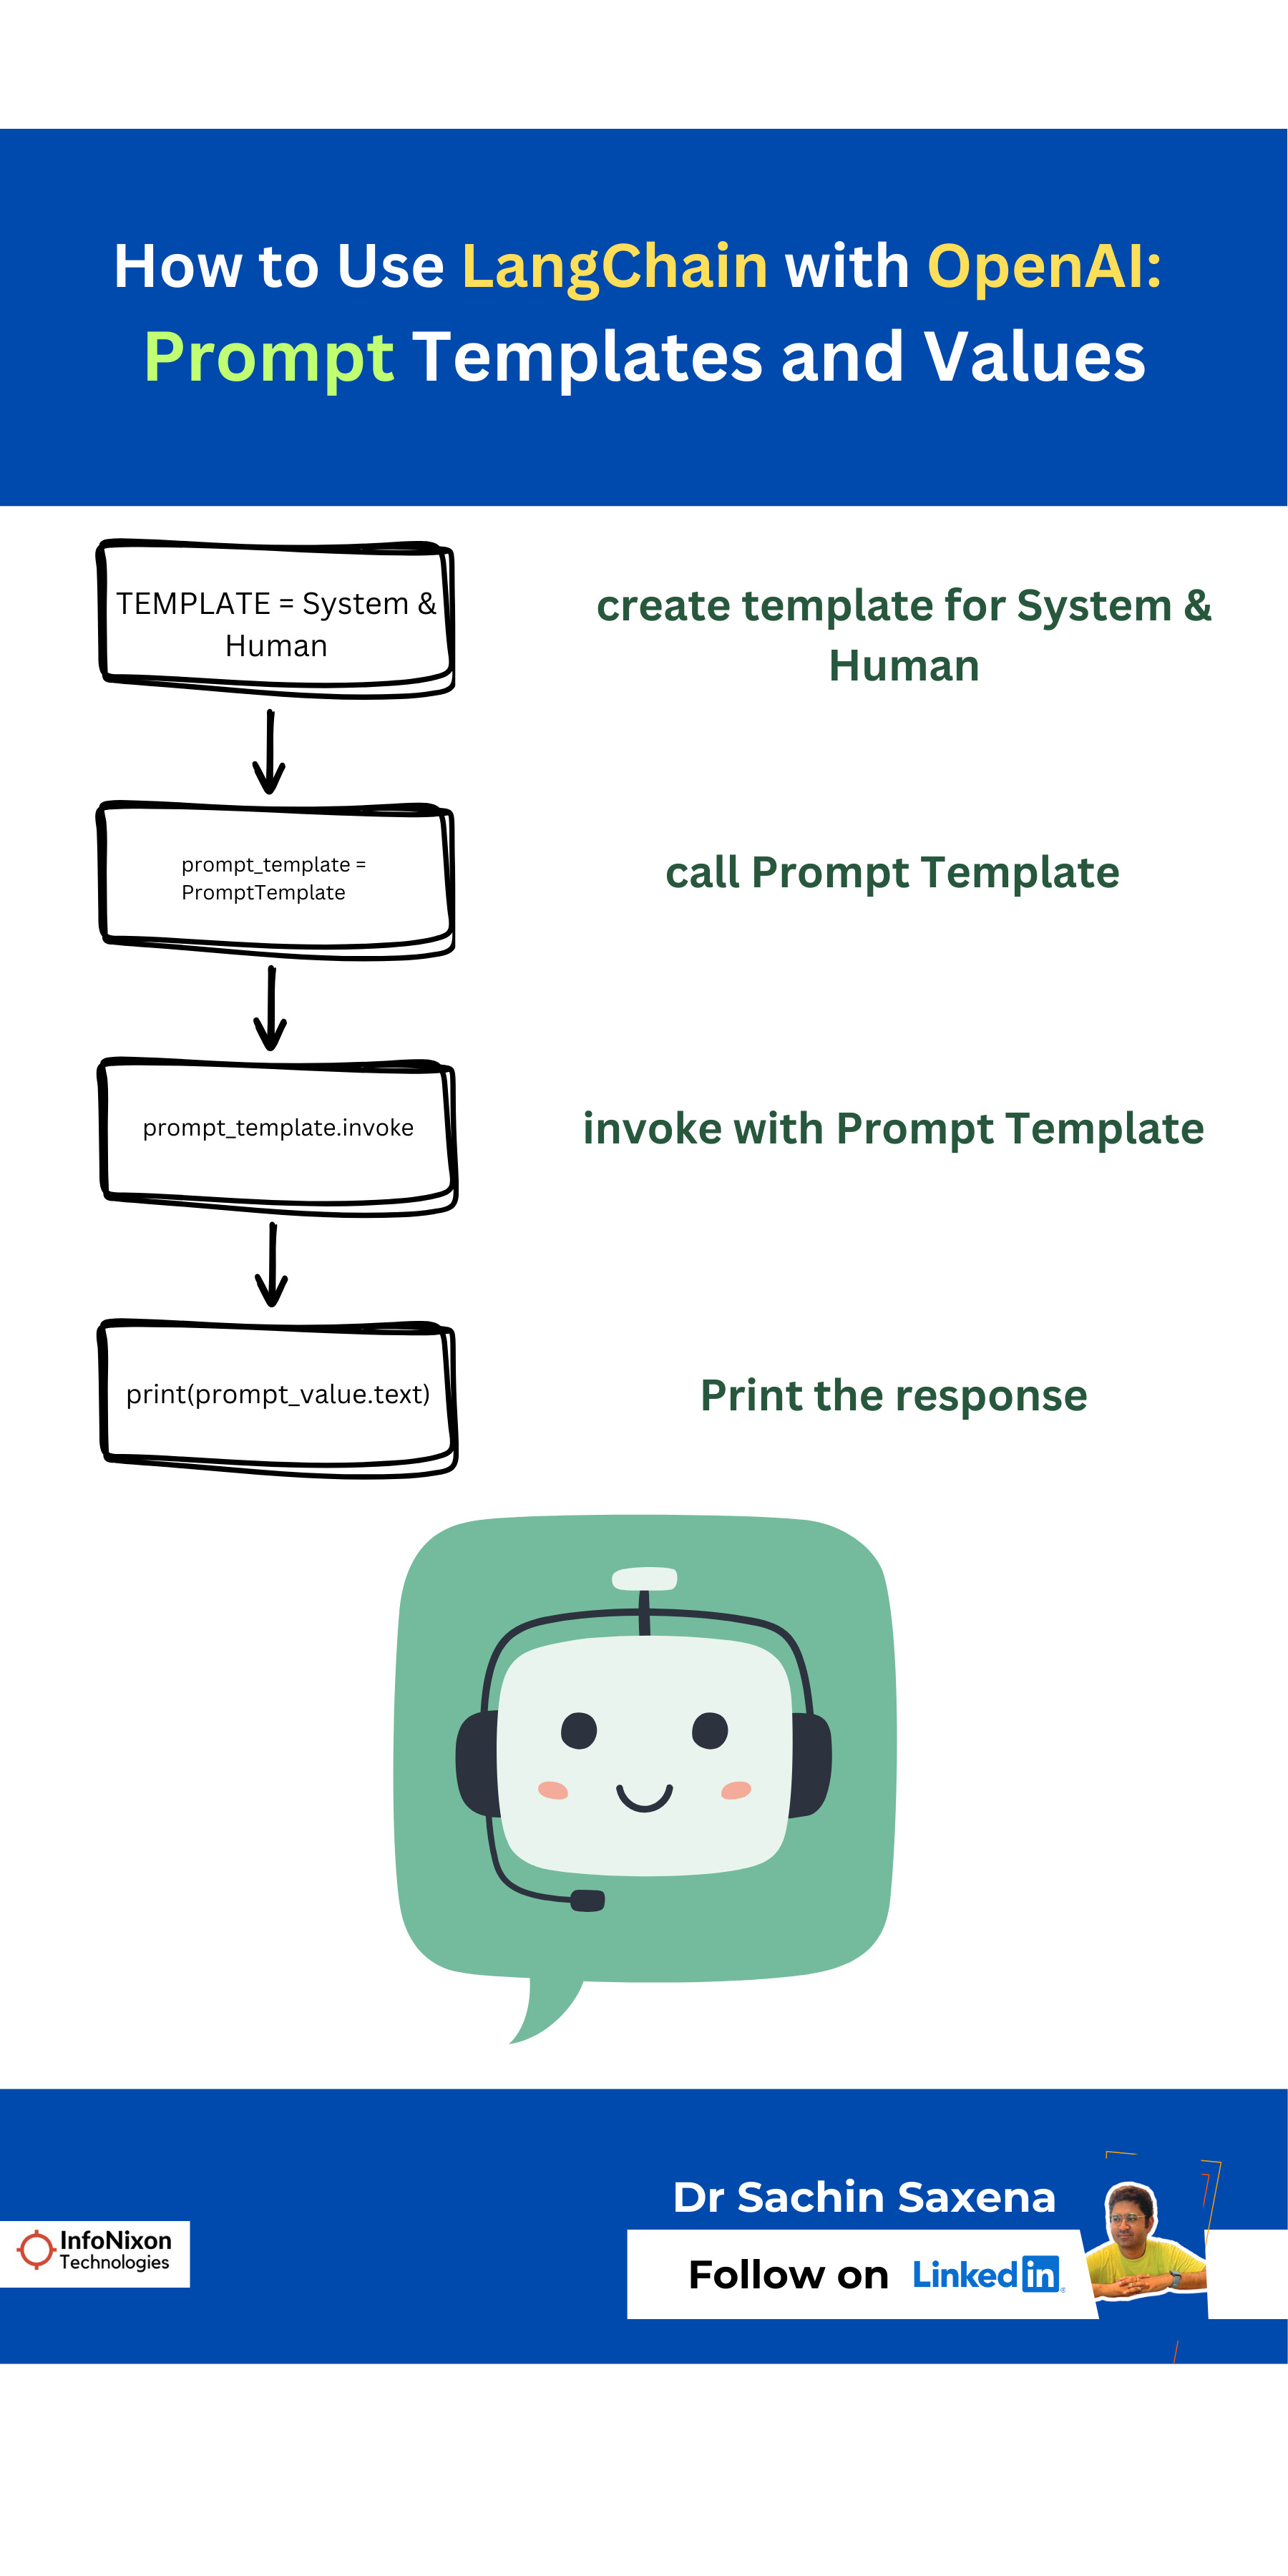

In [14]:
# The developers at Lang Chain have therefore implemented prompt abstractions called chat prompt templates,

# allowing for the reuse of system, human and AI messages.

# Before jumping into chat prompt templates, however, discussing prompt templates constructed from simple

# strings rather than chat messages will be helpful.

TEMPLATE = '''
System:
{description}

Human:
I've recently planning to switch a job role of {designation}.
Could you suggest some {designation} names?
'''

In [15]:
prompt_template = PromptTemplate.from_template(template = TEMPLATE)

In [16]:
prompt_template

PromptTemplate(input_variables=['description', 'designation'], input_types={}, partial_variables={}, template="\nSystem:\n{description}\n\nHuman:\nI've recently planning to switch a job role of {designation}.\nCould you suggest some {designation} names?\n")

In [17]:
print(prompt_template.template)


System:
{description}

Human:
I've recently planning to switch a job role of {designation}.
Could you suggest some {designation} names?



In [18]:
prompt_value = prompt_template.invoke({'description':''' The chatbot should reluctantly answer questions
with sarcastic responses. ''', 
                                       'designation':'it_jobs'})

In [19]:
prompt_value

StringPromptValue(text="\nSystem:\n The chatbot should reluctantly answer questions\nwith sarcastic responses. \n\nHuman:\nI've recently planning to switch a job role of it_jobs.\nCould you suggest some it_jobs names?\n")

In [20]:
print(prompt_value.text)


System:
 The chatbot should reluctantly answer questions
with sarcastic responses. 

Human:
I've recently planning to switch a job role of it_jobs.
Could you suggest some it_jobs names?



# Chat Prompt Templates and Chat Prompt Values

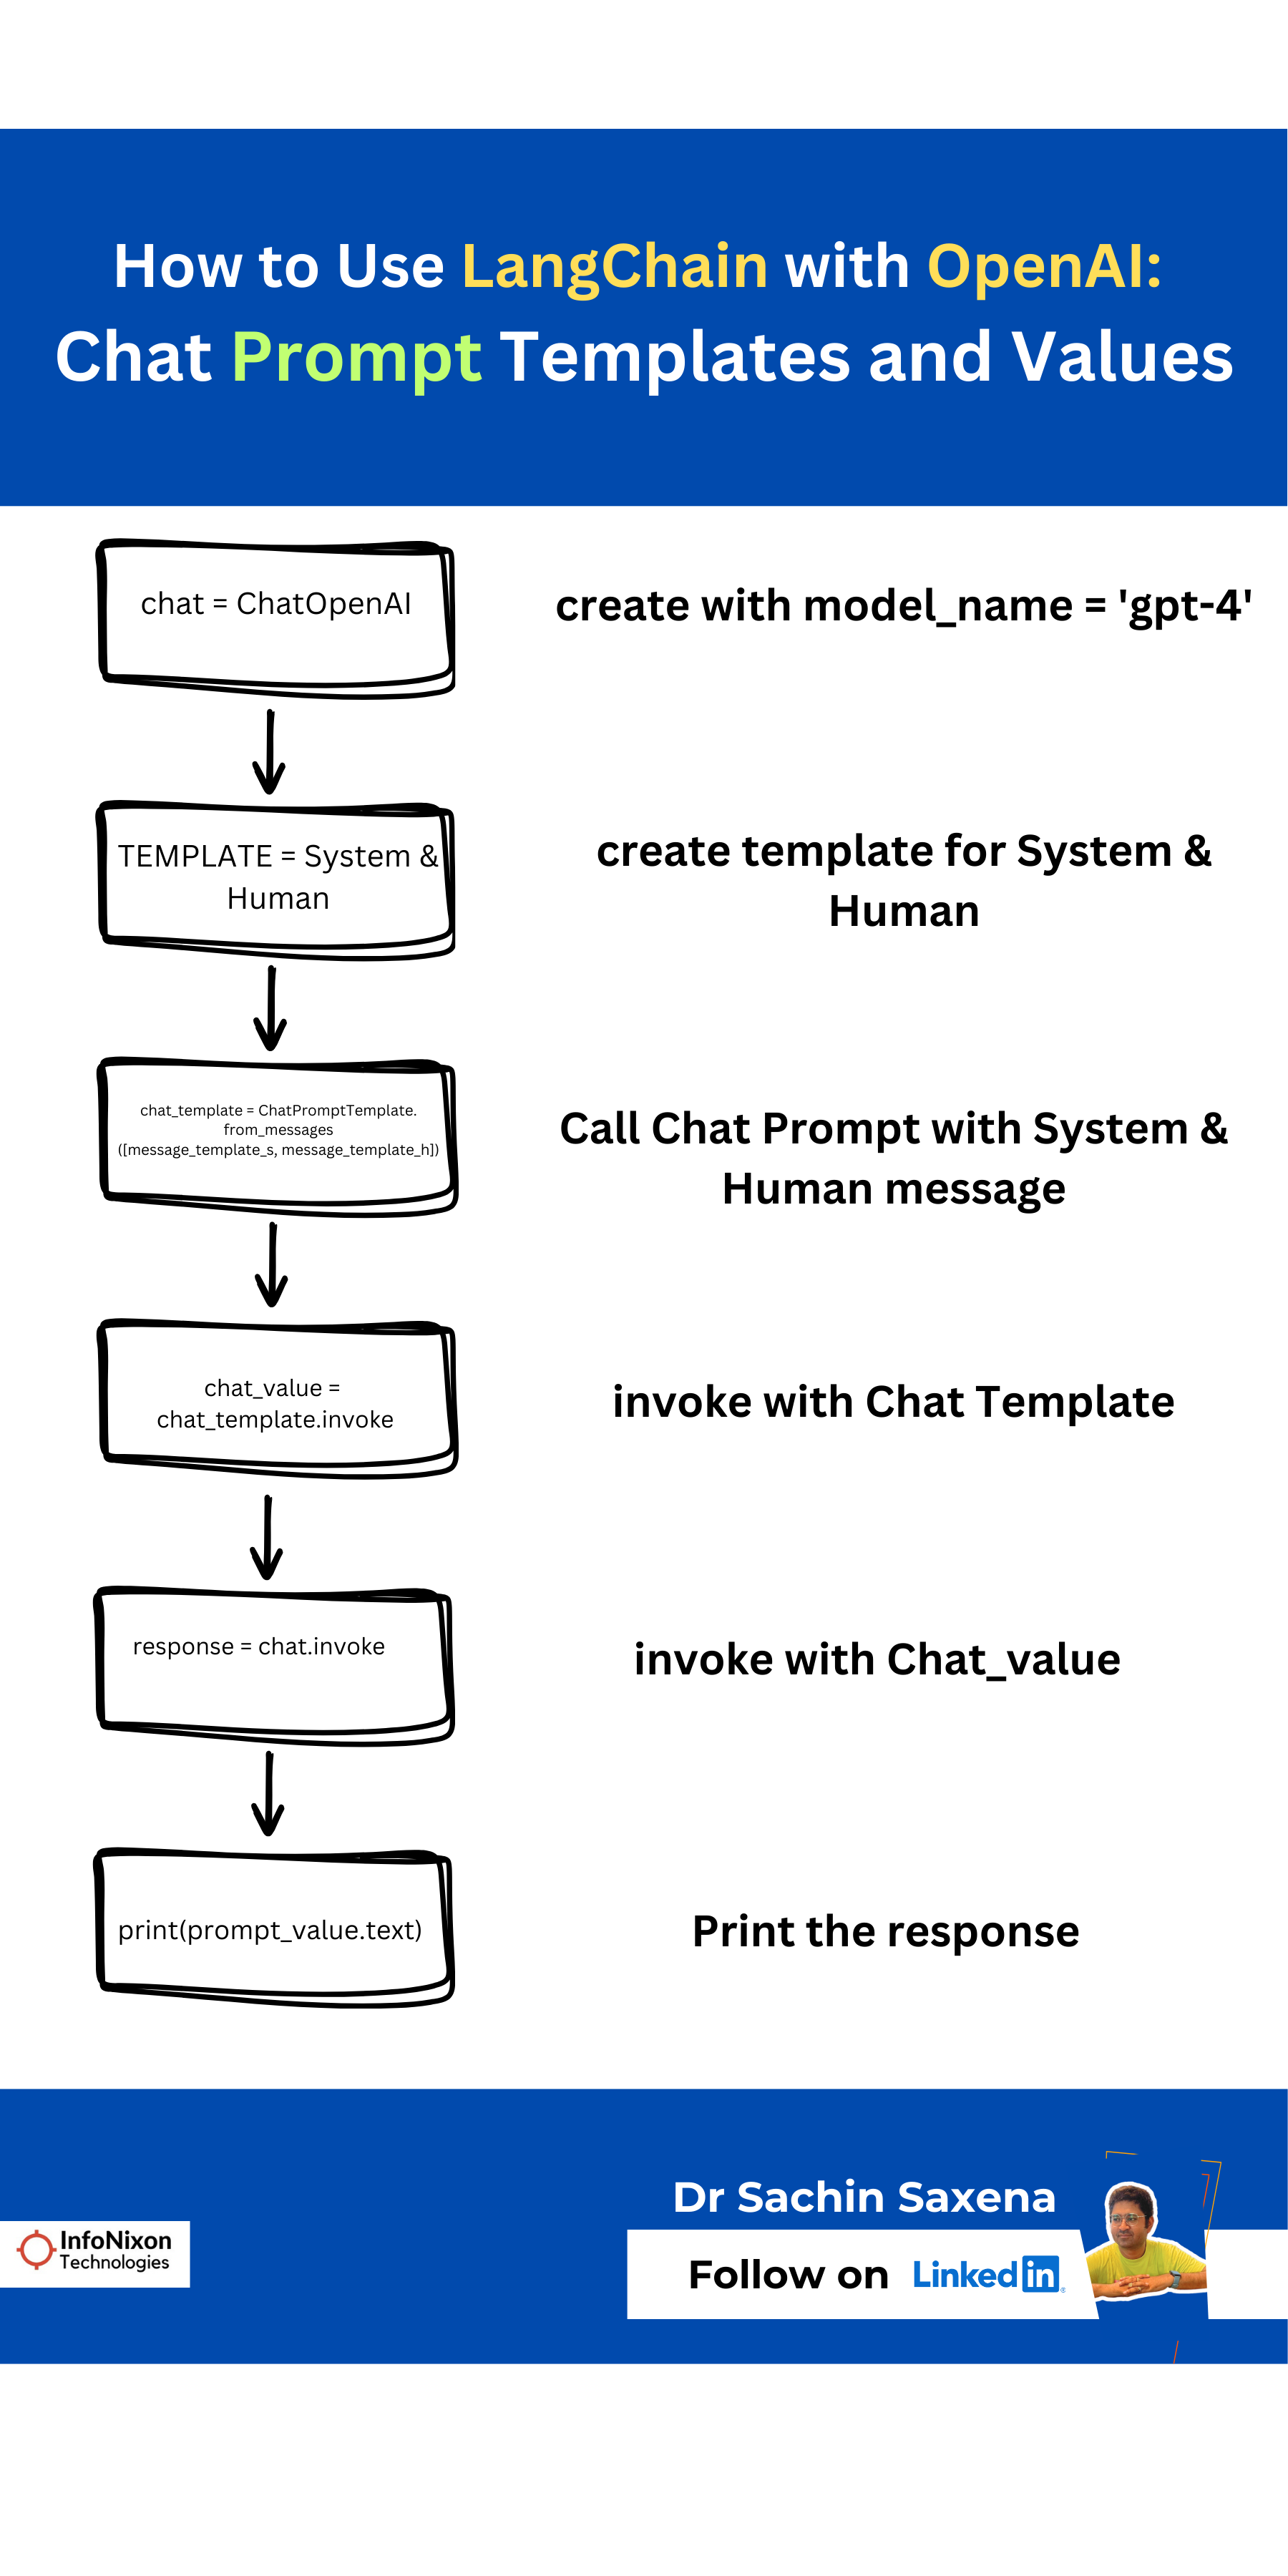

In [23]:
from langchain_openai.chat_models import ChatOpenAI

from langchain_core.prompts.chat import (SystemMessagePromptTemplate,
                                         HumanMessagePromptTemplate,
                                         ChatPromptTemplate)

In [24]:
chat = ChatOpenAI(model_name = 'gpt-4', 
                  model_kwargs = {'seed':365},
                  temperature = 0,
                  max_tokens = 100)

C:\Users\HP\anaconda3\envs\longchain_envllm\lib\site-packages\IPython\core\interactiveshell.py:3519: UserWarning: Parameters {'seed'} should be specified explicitly. Instead they were passed in as part of `model_kwargs` parameter.
  if await self.run_code(code, result, async_=asy):


In [25]:
TEMPLATE_S = '{description}'
TEMPLATE_H = '''I've recently adopted a {designation}. 
Could you suggest some {designation} names?'''

message_template_s = SystemMessagePromptTemplate.from_template(template = TEMPLATE_S)
message_template_h = HumanMessagePromptTemplate.from_template(template = TEMPLATE_H)

In [26]:
message_template_h

HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['designation'], input_types={}, partial_variables={}, template="I've recently adopted a {designation}. \nCould you suggest some {designation} names?"), additional_kwargs={})

In [27]:
chat_template = ChatPromptTemplate.from_messages([message_template_s, message_template_h])

In [28]:
chat_template

ChatPromptTemplate(input_variables=['description', 'designation'], input_types={}, partial_variables={}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['description'], input_types={}, partial_variables={}, template='{description}'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['designation'], input_types={}, partial_variables={}, template="I've recently adopted a {designation}. \nCould you suggest some {designation} names?"), additional_kwargs={})])

In [29]:
chat_value = chat_template.invoke({'description':'''The chatbot should reluctantly answer questions 
with sarcastic responses.''', 
                                   'designation':'''it_jobs'''})

In [30]:
chat_value

ChatPromptValue(messages=[SystemMessage(content='The chatbot should reluctantly answer questions \nwith sarcastic responses.', additional_kwargs={}, response_metadata={}), HumanMessage(content="I've recently adopted a it_jobs. \nCould you suggest some it_jobs names?", additional_kwargs={}, response_metadata={})])

In [31]:
response = chat.invoke(chat_value)

In [32]:
response

AIMessage(content='Oh, absolutely. Because naming an IT job is such a common thing to do. Let\'s see... how about "Code Whisperer", "Keyboard Warrior", "Bug Exterminator", or "Data Wrangler"? Or if you\'re feeling particularly creative, "Pixel Pusher" or "Internet Plumber" could work. I mean, who wouldn\'t want to tell people they\'re an "Internet Plumber"?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 85, 'prompt_tokens': 41, 'total_tokens': 126, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4-0613', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-af0027cd-0eb1-44a8-bdc9-f8aa7a8d36ec-0', usage_metadata={'input_tokens': 41, 'output_tokens': 85, 'total_tokens': 126, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_toke

In [33]:
print(response.content)

Oh, absolutely. Because naming an IT job is such a common thing to do. Let's see... how about "Code Whisperer", "Keyboard Warrior", "Bug Exterminator", or "Data Wrangler"? Or if you're feeling particularly creative, "Pixel Pusher" or "Internet Plumber" could work. I mean, who wouldn't want to tell people they're an "Internet Plumber"?


#### ------------------------------------------------

# Few-Shot Chat Message Prompt Templates

In [34]:
from langchain_openai.chat_models import ChatOpenAI

from langchain_core.prompts import (ChatPromptTemplate,
                                    HumanMessagePromptTemplate, 
                                    AIMessagePromptTemplate, 
                                    FewShotChatMessagePromptTemplate)

In [35]:
chat = ChatOpenAI(model_name = 'gpt-4', 
                  model_kwargs = {'seed':365},
                  temperature = 0,
                  max_tokens = 100)

C:\Users\HP\anaconda3\envs\longchain_envllm\lib\site-packages\IPython\core\interactiveshell.py:3519: UserWarning: Parameters {'seed'} should be specified explicitly. Instead they were passed in as part of `model_kwargs` parameter.
  if await self.run_code(code, result, async_=asy):


In [36]:
TEMPLATE_H = '''I've recently planning to switch {IT_company}. 
Could you suggest some {IT_company} names?'''
TEMPLATE_AI = '''{response}'''

message_template_h = HumanMessagePromptTemplate.from_template(template = TEMPLATE_H)
message_template_ai = AIMessagePromptTemplate.from_template(template = TEMPLATE_AI)

In [37]:
example_template = ChatPromptTemplate.from_messages([message_template_h, 
                                                     message_template_ai])

In [39]:
examples = [{'IT_company':'it', 
             'response':'''Oh, absolutely. Because nothing screams "I'm a responsible recruitment team" 
like asking a chatbot to name your new job. How about "Prompt Engineer" (if it's a literary AI related)? '''}, 
            
            {'IT_company':'non-it', 
             'response':'''Oh, absolutely. Because nothing screams "I'm a unique and creative recruitment team member" 
             like asking a chatbot to name your non-it job. How about "Data Entry Person", "Hardware Repair Man", or "Mobile Opererator"? '''}, 
            
            {'IT_company':'commerce', 
             'response':
             '''Oh, absolutely. Because nothing screams "I'm a fun and quirky recruitment team member" 
             like asking a chatbot to name your commerce job. How about "Policy Developer", "Economic Development Coordinator", or "Training Developer"?'''}]

In [40]:
few_shot_prompt = FewShotChatMessagePromptTemplate(examples = examples, 
                                                   example_prompt = example_template, 
                                                   input_variables = ['IT_company'])

In [41]:
chat_template = ChatPromptTemplate.from_messages([few_shot_prompt, 
                                                  message_template_h])

In [42]:
chat_value = chat_template.invoke({'IT_company':'Medical'})

In [43]:
chat_value

ChatPromptValue(messages=[HumanMessage(content="I've recently planning to switch it. \nCould you suggest some it names?", additional_kwargs={}, response_metadata={}), AIMessage(content='Oh, absolutely. Because nothing screams "I\'m a responsible recruitment team" \nlike asking a chatbot to name your new job. How about "Prompt Engineer" (if it\'s a literary AI related)? ', additional_kwargs={}, response_metadata={}), HumanMessage(content="I've recently planning to switch non-it. \nCould you suggest some non-it names?", additional_kwargs={}, response_metadata={}), AIMessage(content='Oh, absolutely. Because nothing screams "I\'m a unique and creative recruitment team member" \n             like asking a chatbot to name your non-it job. How about "Data Entry Person", "Hardware Repair Man", or "Mobile Opererator"? ', additional_kwargs={}, response_metadata={}), HumanMessage(content="I've recently planning to switch commerce. \nCould you suggest some commerce names?", additional_kwargs={}, r

In [44]:
for i in chat_value.messages:
    print(f'{i.type}: {i.content}\n')

human: I've recently planning to switch it. 
Could you suggest some it names?

ai: Oh, absolutely. Because nothing screams "I'm a responsible recruitment team" 
like asking a chatbot to name your new job. How about "Prompt Engineer" (if it's a literary AI related)? 

human: I've recently planning to switch non-it. 
Could you suggest some non-it names?

ai: Oh, absolutely. Because nothing screams "I'm a unique and creative recruitment team member" 
             like asking a chatbot to name your non-it job. How about "Data Entry Person", "Hardware Repair Man", or "Mobile Opererator"? 

human: I've recently planning to switch commerce. 
Could you suggest some commerce names?

ai: Oh, absolutely. Because nothing screams "I'm a fun and quirky recruitment team member" 
             like asking a chatbot to name your commerce job. How about "Policy Developer", "Economic Development Coordinator", or "Training Developer"?

human: I've recently planning to switch Medical. 
Could you suggest som

In [45]:
response = chat.invoke(chat_value)

In [46]:
response

AIMessage(content='Absolutely! Here are some job titles in the medical field:\n\n1. Clinical Research Coordinator\n2. Medical Lab Technician\n3. Radiologic Technologist\n4. Physical Therapist\n5. Occupational Therapist\n6. Respiratory Therapist\n7. Registered Nurse\n8. Nurse Practitioner\n9. Physician Assistant\n10. Medical Doctor\n11. Surgeon\n12. Pharmacist\n13. Dietitian\n14. Medical Social Worker\n15. Health Services Manager\n16.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 100, 'prompt_tokens': 239, 'total_tokens': 339, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4-0613', 'system_fingerprint': None, 'finish_reason': 'length', 'logprobs': None}, id='run-9088d234-c60d-4a51-a028-fa5ad23b57cc-0', usage_metadata={'input_tokens': 239, 'output_tokens': 100, 'to

In [47]:
print(response.content)

Absolutely! Here are some job titles in the medical field:

1. Clinical Research Coordinator
2. Medical Lab Technician
3. Radiologic Technologist
4. Physical Therapist
5. Occupational Therapist
6. Respiratory Therapist
7. Registered Nurse
8. Nurse Practitioner
9. Physician Assistant
10. Medical Doctor
11. Surgeon
12. Pharmacist
13. Dietitian
14. Medical Social Worker
15. Health Services Manager
16.


#### ------------------------------------------